In [1]:
# imports and setup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
# read csv file, skip first 3 rows, and save them in pandas dataframe
file_name = "./data/open-meteo-46.08N14.45E302m.csv"
with open(file_name, 'r') as f:
    df = pd.read_csv(f, skiprows=3)

df.head(10)

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,2000-01-01,3.0,0.6,-14.6,-6.9,-2.5,-19.0,-10.8,2000-01-01T07:44,2000-01-01T16:26,0.0,0.0,0.0,0.0,6.1,16.2,249.0,6.22,0.48
1,2000-01-02,3.0,3.2,-3.3,-0.7,0.5,-6.5,-3.9,2000-01-02T07:44,2000-01-02T16:27,0.0,0.0,0.0,0.0,6.1,13.7,204.0,4.62,0.46
2,2000-01-03,3.0,1.7,-11.0,-4.9,-1.9,-15.0,-8.6,2000-01-03T07:44,2000-01-03T16:28,0.0,0.0,0.0,0.0,7.3,19.8,256.0,5.70,0.46
3,2000-01-04,1.0,3.9,-10.8,-4.3,0.8,-15.1,-8.0,2000-01-04T07:44,2000-01-04T16:29,0.0,0.0,0.0,0.0,6.7,16.2,252.0,6.60,0.58
4,2000-01-05,2.0,4.5,-10.0,-3.5,1.7,-13.9,-6.9,2000-01-05T07:43,2000-01-05T16:30,0.0,0.0,0.0,0.0,4.7,14.0,257.0,5.98,0.54
5,2000-01-06,0.0,3.1,-9.4,-3.8,0.4,-13.2,-7.0,2000-01-06T07:43,2000-01-06T16:31,0.0,0.0,0.0,0.0,4.3,11.9,186.0,6.33,0.52
6,2000-01-07,3.0,1.9,-9.7,-3.7,-0.7,-13.1,-6.9,2000-01-07T07:43,2000-01-07T16:32,0.0,0.0,0.0,0.0,4.4,11.5,137.0,5.22,0.45
7,2000-01-08,2.0,2.3,-8.2,-2.7,-0.4,-11.5,-5.7,2000-01-08T07:43,2000-01-08T16:33,0.0,0.0,0.0,0.0,5.7,10.4,134.0,5.50,0.47
8,2000-01-09,3.0,0.8,-5.1,-2.2,-1.9,-8.0,-5.1,2000-01-09T07:43,2000-01-09T16:34,0.0,0.0,0.0,0.0,4.1,9.0,91.0,2.08,0.25
9,2000-01-10,3.0,-0.5,-5.3,-3.0,-4.2,-9.0,-6.4,2000-01-10T07:42,2000-01-10T16:35,0.0,0.0,0.0,0.0,7.6,20.5,85.0,3.39,0.31


In [3]:
df.tail(10)

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
8707,2023-11-03,63.0,14.2,5.6,11.0,13.9,3.8,9.8,2023-11-03T06:45,2023-11-03T16:45,16.4,28.2,0.0,19.0,24.0,47.2,207.0,1.67,0.81
8708,2023-11-04,61.0,11.7,6.2,8.5,10.6,4.3,7.2,2023-11-04T06:46,2023-11-04T16:44,3.4,3.4,0.0,5.0,5.4,13.7,270.0,1.79,0.71
8709,2023-11-05,63.0,16.0,7.9,10.8,13.2,5.3,9.0,2023-11-05T06:48,2023-11-05T16:43,2.8,26.6,0.0,11.0,21.3,47.9,287.0,2.38,1.03
8710,2023-11-06,51.0,16.3,5.2,9.9,14.9,3.4,8.5,2023-11-06T06:49,2023-11-06T16:41,0.3,0.3,0.0,2.0,14.1,32.0,246.0,2.13,1.03
8711,2023-11-07,61.0,13.0,4.2,8.1,12.2,2.3,6.9,2023-11-07T06:50,2023-11-07T16:40,0.5,4.2,0.0,7.0,5.5,21.2,240.0,2.22,0.72
8712,2023-11-08,51.0,12.8,2.5,6.9,11.2,0.1,5.2,2023-11-08T06:52,2023-11-08T16:39,0.2,0.2,0.0,1.0,5.5,15.5,278.0,1.95,0.93
8713,2023-11-09,3.0,13.2,2.1,7.4,10.5,-0.2,5.4,2023-11-09T06:53,2023-11-09T16:37,-0.1,0.0,0.0,0.0,16.0,33.1,244.0,1.95,0.78
8714,2023-11-10,63.0,10.5,6.0,8.2,9.6,4.2,7.1,2023-11-10T06:55,2023-11-10T16:36,3.4,25.0,0.0,18.0,7.5,14.8,272.0,0.93,0.32
8715,2023-11-11,55.0,6.1,6.1,NaN,4.4,4.4,NaN,2023-11-11T06:56,2023-11-11T16:35,NaN,NaN,NaN,1.0,4.8,6.1,NaN,NaN,NaN
8716,2023-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-12T06:58,2023-11-12T16:34,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.iloc[:-6]

In [5]:
df.columns

Index(['time', 'weather_code (wmo code)', 'temperature_2m_max (°C)',
       'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'apparent_temperature_mean (°C)', 'sunrise (iso8601)',
       'sunset (iso8601)', 'precipitation_sum (mm)', 'rain_sum (mm)',
       'snowfall_sum (cm)', 'precipitation_hours (h)',
       'wind_speed_10m_max (km/h)', 'wind_gusts_10m_max (km/h)',
       'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)',
       'et0_fao_evapotranspiration (mm)'],
      dtype='object')

In [6]:
df.describe()

,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
count,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000,8711.000000
mean,31.560900,15.307519,6.447055,10.752795,14.099173,4.840007,9.453840,3.029342,2.755918,0.207629,4.179887,11.668500,30.970141,167.963035,12.755042,2.174235
std,28.700463,8.735537,7.585127,8.088546,10.678644,9.296680,9.908329,6.585936,6.287726,1.268090,6.185713,4.704804,11.520891,89.315589,7.802264,1.570729
min,0.000000,-10.000000,-24.500000,-15.100000,-14.900000,-29.200000,-19.900000,-0.100000,0.000000,0.000000,0.000000,2.500000,7.200000,0.000000,0.490000,0.130000
25%,3.000000,8.300000,0.500000,4.100000,5.300000,-2.600000,1.300000,0.000000,0.000000,0.000000,0.000000,7.900000,22.700000,81.000000,5.705000,0.710000
50%,51.000000,15.700000,6.900000,11.200000,14.100000,5.000000,9.600000,0.100000,0.000000,0.000000,1.000000,10.900000,29.900000,188.000000,11.660000,1.800000
75%,55.000000,22.200000,12.700000,17.400000,22.500000,12.500000,17.600000,2.500000,2.000000,0.000000,7.000000,14.700000,38.200000,247.000000,19.860000,3.490000
max,75.000000,37.400000,23.400000,29.200000,40.300000,25.600000,31.100000,77.200000,77.200000,25.620000,24.000000,33.500000,82.400000,360.000000,29.240000,7.010000


In [7]:
# take temperature mean and precipitation sum as target variables, and shift them by 1 day
y = df[['time', 'temperature_2m_mean (°C)', 'precipitation_sum (mm)']]
y = y.set_index('time')
y = y.shift(-1)
y = y.dropna()
y.head(10)

,temperature_2m_mean (°C),precipitation_sum (mm)
time,,
2000-01-01,-0.7,0.0
2000-01-02,-4.9,0.0
2000-01-03,-4.3,0.0
2000-01-04,-3.5,0.0
2000-01-05,-3.8,0.0
2000-01-06,-3.7,0.0
2000-01-07,-2.7,0.0
2000-01-08,-2.2,0.0
2000-01-09,-3.0,0.0


In [8]:
df = df.set_index('time')
df = df.iloc[:-1] # drop last row

In [9]:
# feature engineering
# extract year, month, day, weekday, and drop the original time column
df['time'] = pd.to_datetime(df.index)
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['weekday'] = df['time'].dt.weekday
df = df.drop(columns=['time'])

In [10]:
# extract minute in day from sunrise and sunset columns: 'sunrise (iso8601)', 'sunset (iso8601)'
df['sunrise'] = pd.to_datetime(df['sunrise (iso8601)'])
df['sunrise'] = df['sunrise'].dt.hour * 60 + df['sunrise'].dt.minute
df['sunset'] = pd.to_datetime(df['sunset (iso8601)'])
df['sunset'] = df['sunset'].dt.hour * 60 + df['sunset'].dt.minute
df = df.drop(columns=['sunrise (iso8601)', 'sunset (iso8601)'])

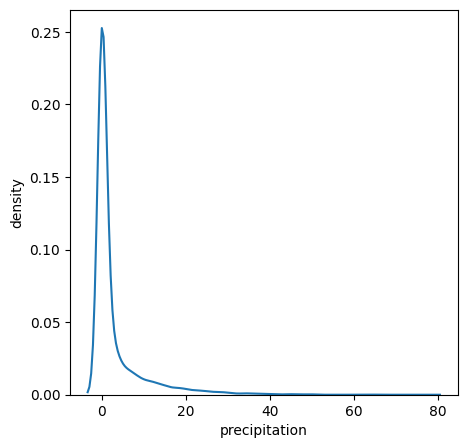

In [11]:
# plot precipitation kde 
plt.figure(figsize=(5, 5))
sns.kdeplot(df['precipitation_sum (mm)'])
plt.xlabel('precipitation')
plt.ylabel('density')
plt.show()


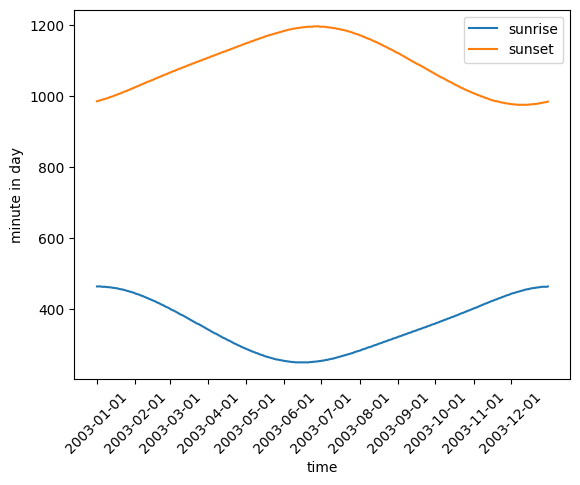

In [12]:
# plot sunrise and sunset for year 2003
plt.plot(df[df['year'] == 2003]['sunrise'])
plt.plot(df[df['year'] == 2003]['sunset'])
plt.legend(['sunrise', 'sunset'])
# do not show all time stamps on x-axis, but only month numbers at the beginning of each month
plt.xticks(df[df['year'] == 2003].index[df[df['year'] == 2003]['day'] == 1], rotation=45)
plt.xlabel('time')
plt.ylabel('minute in day')
plt.show()

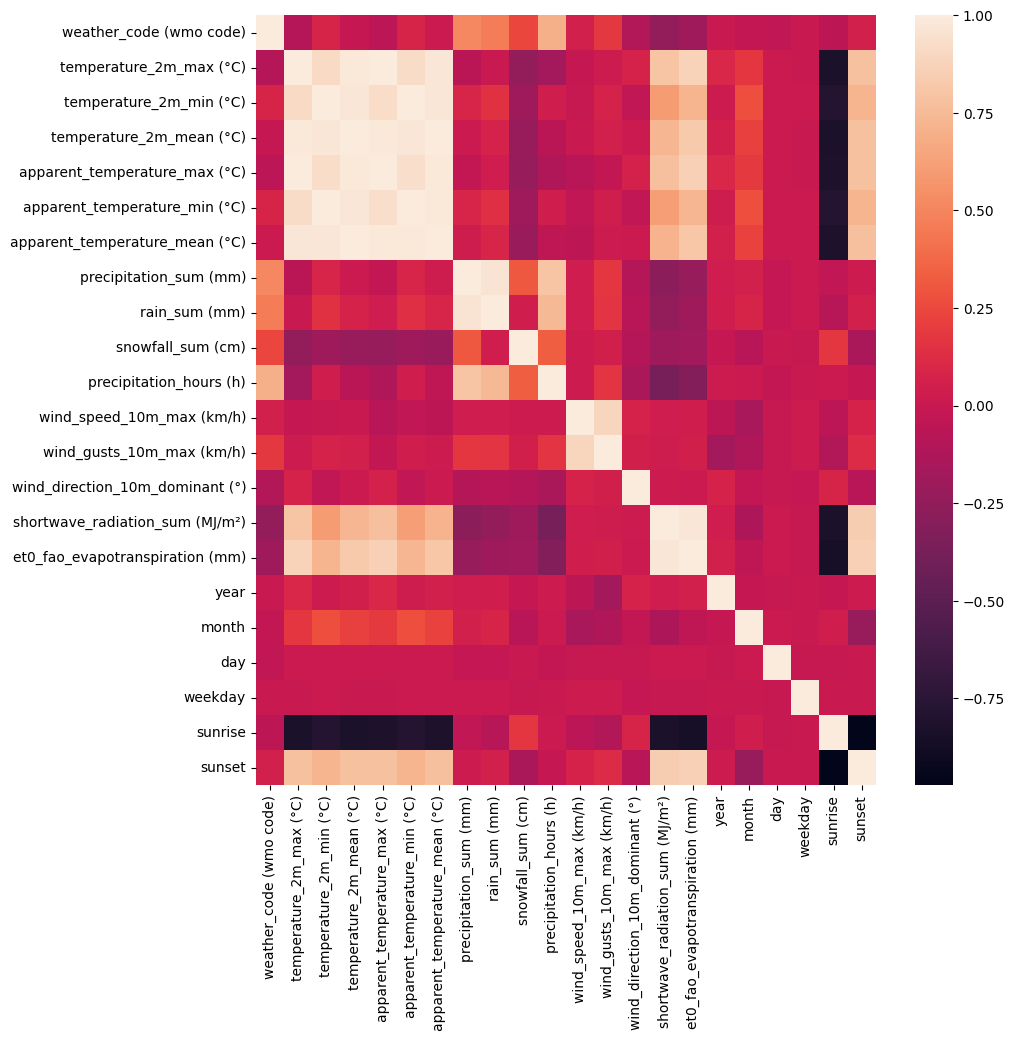

In [13]:
# plot correlation matrix, without numbers
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=False)
plt.show()

### Naive predictions

rolling average

In [14]:
# predict rolling average temperature and precipitation for the next day
# use the last 10 days as input
def create_rolling_average(df, column, window_size):
    df[column + '_rolling'] = df[column].rolling(window=window_size).mean()
    return df

df_tmp = create_rolling_average(df.copy(), 'temperature_2m_mean (°C)', 10)
df_pre = create_rolling_average(df.copy(), 'precipitation_sum (mm)', 10)


In [15]:
# calculate RMSE for rolling average temperature and precipitation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# drop first 10 rows, because they contain NaN values
df_tmp1 = df_tmp.iloc[10:]
df_pre1 = df_pre.iloc[10:]

print('RMSE rolling average temperature: ', rmse(df_tmp1['temperature_2m_mean (°C)'], df_tmp1['temperature_2m_mean (°C)_rolling']))
print('RMSE rolling average precipitation: ', rmse(df_pre1['precipitation_sum (mm)'], df_pre1['precipitation_sum (mm)_rolling']))


RMSE rolling average temperature:  2.633159375892499
RMSE rolling average precipitation:  6.165395019552797


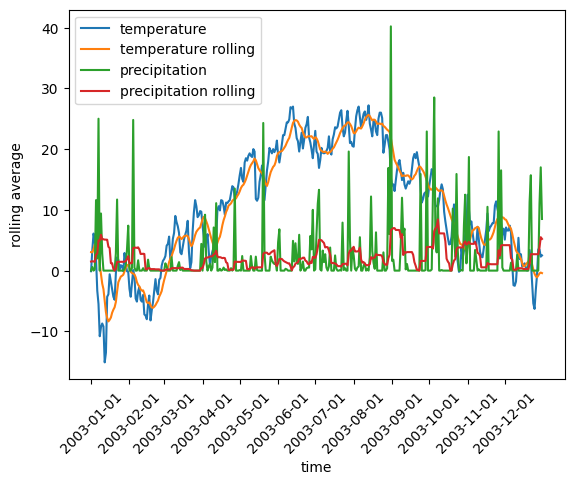

In [16]:

# plot rolling average temperature and precipitation for year 2003
plt.plot(df_tmp[df_tmp['year'] == 2003]['temperature_2m_mean (°C)'])
plt.plot(df_tmp[df_tmp['year'] == 2003]['temperature_2m_mean (°C)_rolling'])
plt.plot(df_pre[df_pre['year'] == 2003]['precipitation_sum (mm)'])
plt.plot(df_pre[df_pre['year'] == 2003]['precipitation_sum (mm)_rolling'])
plt.legend(['temperature', 'temperature rolling', 'precipitation', 'precipitation rolling'])
plt.xticks(df[df['year'] == 2003].index[df[df['year'] == 2003]['day'] == 1], rotation=45)
plt.xlabel('time')
plt.ylabel('rolling average')
plt.show()


linear regression

In [17]:
# linear regression

# split data into train and test set
X = df.copy() #.drop(columns=['temperature_2m_mean (°C)', 'precipitation_sum (mm)'])
y = df[['temperature_2m_mean (°C)', 'precipitation_sum (mm)']]
y = y.shift(-1)
y = y.dropna()
X = X.iloc[:-1] # drop last row
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)

# calculate RMSE
print('RMSE temperature: ', rmse(y_test['temperature_2m_mean (°C)'], y_pred[:, 0]))
print('RMSE precipitation: ', rmse(y_test['precipitation_sum (mm)'], y_pred[:, 1]))


RMSE temperature:  1.9574192214455342
RMSE precipitation:  6.8744794189061


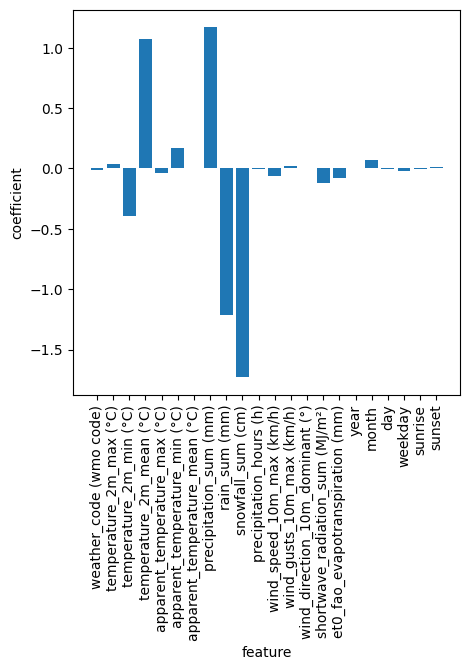

In [18]:
c = model.coef_ 
# plot coefficients for target variable: temperature mean
plt.figure(figsize=(5, 5))
plt.bar(X.columns, c[0])
plt.xticks(rotation=90)
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.show()

In [19]:
# 2 seperate plots for predicted and true temperature and precipitation (y_test vs y_pred)
# reset index of y_test and y_pred, so that they have the same index
y_test = y_test.reset_index(drop=True)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = y_test.columns
y_pred = y_pred.reset_index(drop=True)


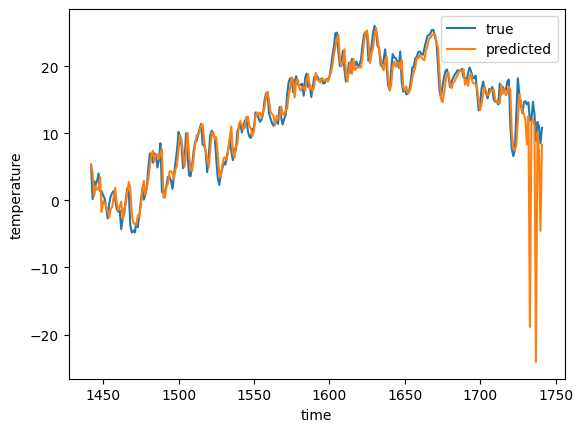

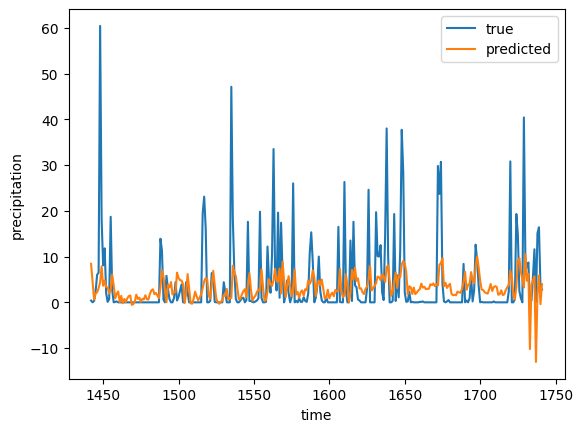

In [20]:

# plot temperature
plt.plot(y_test['temperature_2m_mean (°C)'][-300:])
plt.plot(y_pred['temperature_2m_mean (°C)'][-300:])
plt.legend(['true', 'predicted'])
plt.xlabel('time')
plt.ylabel('temperature')
plt.show()

# plot precipitation
plt.plot(y_test['precipitation_sum (mm)'][-300:])
plt.plot(y_pred['precipitation_sum (mm)'][-300:])
plt.legend(['true', 'predicted'])
plt.xlabel('time')
plt.ylabel('precipitation')
plt.show()




polynomial regression

In [21]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# train polynomial regression model
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X_train, y_train)

# predict on test set
y_pred = model.predict(X_test)

# calculate RMSE
print('RMSE temperature: ', rmse(y_test['temperature_2m_mean (°C)'], y_pred[:, 0]))
print('RMSE precipitation: ', rmse(y_test['precipitation_sum (mm)'], y_pred[:, 1]))

RMSE temperature:  39.790407270569126
RMSE precipitation:  138.51014156553384


### Tensorflow NeuralNet prediction

autoregressive model

In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler


2023-11-12 12:21:48.015481: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 12:21:48.043728: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 12:21:48.044360: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 12:21:48.694637: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [23]:

def normalize_data(values):
    # Assuming values is a DataFrame
    scaler = MinMaxScaler()  # MinMaxScaler returns values as a numpy array
    values_scaled = scaler.fit_transform(values)
    return pd.DataFrame(values_scaled, index=values.index, columns=values.columns), scaler

X_train_norm, X_scaler = normalize_data(X_train)
y_train_norm, y_scaler = normalize_data(y_train)
X_test_norm, _ = normalize_data(X_test)  # re-use scalers to ensure consistent normalization
y_test_norm, _ = normalize_data(y_test)


In [24]:

np.random.seed(0)
tf.random.set_seed(0)

model = keras.Sequential([keras.layers.Dense(units=y_train.shape[1])])  # specify the number of output units

optimizer = tf.keras.optimizers.SGD(0.01)

model.compile(
    loss='mean_squared_error',
    optimizer=optimizer
)

# Since you didn't provide a validation set, we'll omit the validation_data argument
history = model.fit(
    X_train_norm,
    y_train_norm,
    epochs=10
)


Epoch 1/10


2023-11-12 12:21:49.280869: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-12 12:21:49.281529: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


218/218 [==============================] - 0s 507us/step - loss: 0.0920
Epoch 2/10
218/218 [==============================] - 0s 471us/step - loss: 0.0487
Epoch 3/10
218/218 [==============================] - 0s 478us/step - loss: 0.0318
Epoch 4/10
218/218 [==============================] - 0s 472us/step - loss: 0.0231
Epoch 5/10
218/218 [==============================] - 0s 463us/step - loss: 0.0182
Epoch 6/10
218/218 [==============================] - 0s 449us/step - loss: 0.0151
Epoch 7/10
218/218 [==============================] - 0s 483us/step - loss: 0.0130
Epoch 8/10
218/218 [==============================] - 0s 491us/step - loss: 0.0116
Epoch 9/10
218/218 [==============================] - 0s 474us/step - loss: 0.0105
Epoch 10/10
218/218 [==============================] - 0s 472us/step - loss: 0.0096


55/55 [==============================] - 0s 420us/step


<Figure size 640x480 with 0 Axes>

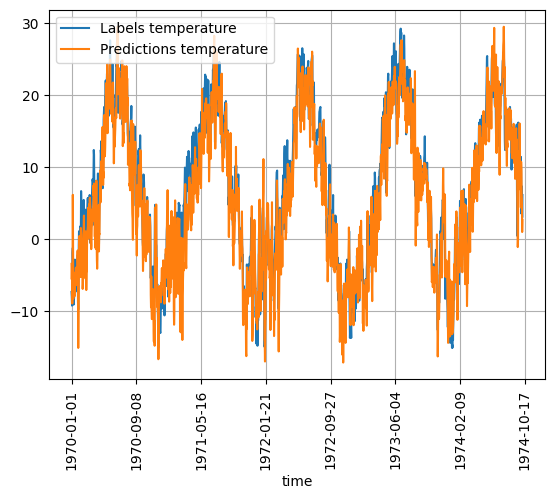

In [25]:

def visualize_predictions(data):
    plt.figure()
    ax = data.plot(x_compat=True, grid=True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=90)
    plt.show()

test_predict = model.predict(X_test_norm)

# Transform predictions and labels back to original scale for visualization and error calculation
test_predict_orig = y_scaler.inverse_transform(test_predict)
y_test_orig = y_scaler.inverse_transform(y_test_norm)

plot_df = pd.DataFrame(index=X_test.index, data = {
    'Labels temperature': y_test_orig[:, 0],
    'Predictions temperature': test_predict_orig[:, 0],
    # 'Labels precipitation': y_test_orig[:, 1],
    # 'Predictions precipitation': test_predict_orig[:, 1]
})

_ = visualize_predictions(plot_df)


In [26]:

mse = mean_squared_error(test_predict_orig, y_test_orig)
print(f"Autoregressive model's MSE score: {mse:.4}")

mse_temp = mean_squared_error(y_test_orig[:, 0], test_predict_orig[:, 0])
rmse_temp = np.sqrt(mse_temp)
print(f"RMSE for temperature: {rmse_temp:.4f}")

mse_precip = mean_squared_error(y_test_orig[:, 1], test_predict_orig[:, 1])
rmse_precip = np.sqrt(mse_precip)
print(f"RMSE for precipitation: {rmse_precip:.4f}")


Autoregressive model's MSE score: 37.55
RMSE for temperature: 3.7202
RMSE for precipitation: 7.8274


complex neural net

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# read csv file, skip first 3 rows, and save them in pandas dataframe
file_name = "./data/open-meteo-46.08N14.45E302m.csv"
df = pd.read_csv(file_name, skiprows=3)

# Drop the last 6 rows, because they contain NaN values
# df = df.iloc[:-6]
# drop rows with NaN values
df = df.dropna()

# First, perform date conversions before setting 'time' as index
df['time'] = pd.to_datetime(df['time'])
df['year_since_2000'] = df['time'].dt.year - 2000
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['day_of_year'] = df['time'].dt.dayofyear
df['weekday'] = df['time'].dt.weekday

# extract hour in day from sunrise and sunset columns
df['sunrise'] = pd.to_datetime(df['sunrise (iso8601)'])
df['sunrise'] = df['sunrise'].dt.hour + df['sunrise'].dt.minute / 60
df['sunset'] = pd.to_datetime(df['sunset (iso8601)'])
df['sunset'] = df['sunset'].dt.hour + df['sunset'].dt.minute / 60

# Now set 'time' as index
df = df.set_index('time')

# Drop columns after extracting necessary features
df = df.drop(columns=['sunrise (iso8601)', 'sunset (iso8601)'])

# Prepare target variables y and shift them by 1 day
y = df[['temperature_2m_mean (°C)', 'precipitation_sum (mm)']].shift(-1)
y = y.dropna()

# Since we shifted y, we need to drop the last row of df to align it with y
df = df.iloc[:-1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, shuffle=False)

# # Normalize the data (optional but often beneficial)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# scaler_y = StandardScaler()
# y_train = scaler_y.fit_transform(y_train)
# y_test = scaler_y.transform(y_test)

# # reconstruct dataframes with the original column names
# X_train = pd.DataFrame(X_train, columns=df.columns)
# X_test = pd.DataFrame(X_test, columns=df.columns)
# y_train = pd.DataFrame(y_train, columns=y.columns)
# y_test = pd.DataFrame(y_test, columns=y.columns)



In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
# set seed
np.random.seed(0)
tf.random.set_seed(0)

input = keras.Input(shape=(X_train.shape[1],))

# Shared layers with L2 regularization
x = layers.Dense(48, activation='relu', kernel_regularizer=regularizers.l2(0.001))(input)
x = layers.BatchNormalization()(x)

# # Another shared layer with L2 regularization
# x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
# x = layers.BatchNormalization()(x)

# # A third shared layer with L2 regularization
# x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
# x = layers.BatchNormalization()(x)

# Task-specific layers for temperature prediction with L2 regularization
x_temp = layers.Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
output_temp = layers.Dense(1, name='temperature')(x_temp)

# Task-specific layers for precipitation prediction with L2 regularization
x_precip = layers.Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
output_precip = layers.Dense(1, name='precipitation')(x_precip)

model = keras.Model(inputs=input, outputs=[output_temp, output_precip])

# Compile with added L2 loss and Adam optimizer with learning rate schedule
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=['mae']
)

# Add Early Stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model.summary()

# Train with Early Stopping
history = model.fit(
    X_train,
    {'temperature': y_train['temperature_2m_mean (°C)'], 'precipitation': y_train['precipitation_sum (mm)']},
    validation_split=0.2,
    shuffle=False,
    epochs=100,  # More epochs with early stopping
    callbacks=[early_stopping]
)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 23)]                 0         []                            
                                                                                                  
 dense_1 (Dense)             (None, 48)                   1152      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 48)                   192       ['dense_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 dense_2 (Dense)             (None, 12)                   588       ['batch_normalization[0][0

In [29]:

# Evaluate model
y_pred = model.predict(X_test)


28/28 [==============================] - 0s 534us/step


In [30]:
y_columns = y_test.columns

# Assuming y_pred is a list of two arrays of shape (1521, 1)
y_pred_temp = pd.DataFrame(y_pred[0], columns=[y_columns[0]])
y_pred_precip = pd.DataFrame(y_pred[1], columns=[y_columns[1]])

# Concatenate the two DataFrames along the column axis
y_pred_df = pd.concat([y_pred_temp, y_pred_precip], axis=1)

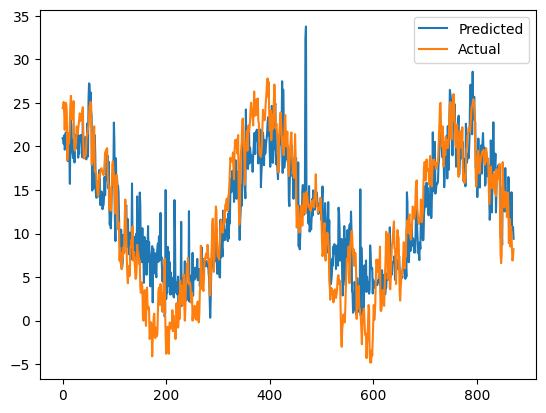

In [31]:
y_pred_df["temperature_2m_mean (°C)"].plot()
y_test.reset_index(drop=True)["temperature_2m_mean (°C)"].plot()
from matplotlib import pyplot as plt
plt.legend(["Predicted", "Actual"])
plt.show()

In [32]:
# # inverse transform of y_test and y_pred_df
# y_test_orig = scaler_y.inverse_transform(y_test)
# y_pred_orig = scaler_y.inverse_transform(y_pred_df)
y_test_orig = y_test.to_numpy()
y_pred_orig = y_pred_df.to_numpy()


# split y_test_orig and y_pred_orig into temperature and precipitation
y_test_temp = y_test_orig[:, 0]
y_test_precip = y_test_orig[:, 1]
y_pred_temp = y_pred_orig[:, 0]
y_pred_precip = y_pred_orig[:, 1]

# calculate MAE
mae_temp = np.mean(np.abs(y_test_temp - y_pred_temp))
mae_precip = np.mean(np.abs(y_test_precip - y_pred_precip))
print('MAE temperature: ', mae_temp)
print('MAE precipitation: ', mae_precip)

# calculate RMSE
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
rmse_temp = np.sqrt(mse_temp)
print(f"RMSE for temperature: {rmse_temp:.4f}")

mse_precip = mean_squared_error(y_test_precip, y_pred_precip)
rmse_precip = np.sqrt(mse_precip)
print(f"RMSE for precipitation: {rmse_precip:.4f}")

MAE temperature:  3.106887371523665
MAE precipitation:  4.071250099668262
RMSE for temperature: 3.9882
RMSE for precipitation: 6.6152


<Figure size 640x480 with 0 Axes>

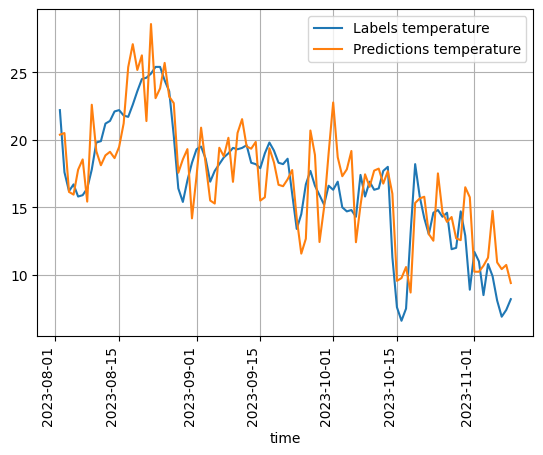

In [33]:
# Plot predictions
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def visualize_predictions(data):
    plt.figure()
    ax = data.plot(x_compat=True, grid=True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=90)
    plt.show()

plot_n = 100
y_test.index = pd.to_datetime(y_test.index)

plot_df = pd.DataFrame(data = {
    'Labels temperature': y_test['temperature_2m_mean (°C)'].values[-plot_n:],
    'Predictions temperature': y_pred_temp[-plot_n:].flatten(),
    # 'Labels precipitation': y_test['precipitation_sum (mm)'].values[-plot_n:],
    # 'Predictions precipitation': y_pred_precip[-plot_n:].flatten()
}, index=y_test.index[-plot_n:])

_ = visualize_predictions(plot_df)

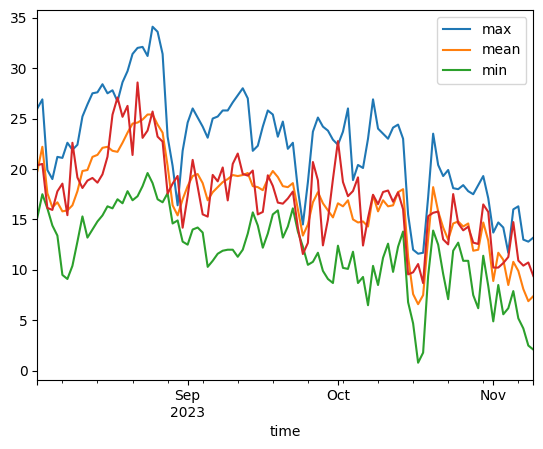

In [34]:
# Plot mean max min temperature 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

last_n = 100
X_test.iloc[-last_n:]['temperature_2m_max (°C)'].plot()
X_test.iloc[-last_n:]['temperature_2m_mean (°C)'].plot()
X_test.iloc[-last_n:]['temperature_2m_min (°C)'].plot()
y_pred_df.index = X_test.index
y_pred_df.iloc[-last_n:]['temperature_2m_mean (°C)'].plot()
plt.legend(['max', 'mean', 'min'])
plt.show()

In [35]:
# save model
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
model.save('models/dnn_multitarget_'+ timestamp +'.h5')

/home/drew99/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
# # save scalers
# import pickle
# pickle.dump(X_scaler, open('X_scaler_'+ timestamp +'.pkl', 'wb'))
# pickle.dump(y_scaler, open('y_scaler_'+ timestamp +'.pkl', 'wb'))

tanh activation for temperature 
zero-inflated regression for precipitation

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# read csv file, skip first 3 rows, and save them in pandas dataframe
file_name = "./data/open-meteo-46.08N14.45E302m.csv"
df = pd.read_csv(file_name, skiprows=3)

# Drop the last 6 rows, because they contain NaN values
# df = df.iloc[:-6]
# drop rows with NaN values
df = df.dropna()

# First, perform date conversions before setting 'time' as index
df['time'] = pd.to_datetime(df['time'])
df['year_since_2000'] = df['time'].dt.year - 2000
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['day_of_year'] = df['time'].dt.dayofyear
df['weekday'] = df['time'].dt.weekday

# extract hour in day from sunrise and sunset columns
df['sunrise'] = pd.to_datetime(df['sunrise (iso8601)'])
df['sunrise'] = df['sunrise'].dt.hour + df['sunrise'].dt.minute / 60
df['sunset'] = pd.to_datetime(df['sunset (iso8601)'])
df['sunset'] = df['sunset'].dt.hour + df['sunset'].dt.minute / 60

# Now set 'time' as index
df = df.set_index('time')

# Drop columns after extracting necessary features
df = df.drop(columns=['sunrise (iso8601)', 'sunset (iso8601)'])

# Prepare target variables y and shift them by 1 day
y = df[['temperature_2m_mean (°C)', 'precipitation_sum (mm)']].shift(-1)
y = y.dropna()
y['precipitation_binary'] = y['precipitation_sum (mm)'].apply(lambda x: 1 if x > 0 else 0)

# Since we shifted y, we need to drop the last row of df to align it with y
df = df.iloc[:-1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, shuffle=False)

# new scaled temperature using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
max_temp_with_margin = y_train['temperature_2m_mean (°C)'].max() + 10
min_temp_with_margin = y_train['temperature_2m_mean (°C)'].min() - 10
scaler.fit([[min_temp_with_margin], [max_temp_with_margin]])
y_train['temperature_2m_mean_scaled'] = scaler.transform(y_train['temperature_2m_mean (°C)'].values.reshape(-1, 1))
y_test['temperature_2m_mean_scaled'] = scaler.transform(y_test['temperature_2m_mean (°C)'].values.reshape(-1, 1))


In [38]:
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Define the model input
input_layer = Input(shape=(X_train.shape[1],))

# Shared layers
x = Dense(48, activation='relu', kernel_regularizer=regularizers.l2(0.001))(input_layer)
x = BatchNormalization()(x)
x = Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)

# Temperature prediction head
temp_dense = Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
temperature_output = Dense(1, activation='tanh', name='temperature')(temp_dense)

# Precipitation prediction head
# Binary classification for rain occurrence
precip_classifier_dense = Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
precipitation_classifier_output = Dense(1, activation='sigmoid', name='precipitation_classifier')(precip_classifier_dense)

# Regression for rain amount, given that it rains
precip_amount_dense = Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
precipitation_amount_output = Dense(1, activation='relu', name='precipitation_amount')(precip_amount_dense)

# Build the model
model = Model(inputs=input_layer, outputs=[temperature_output, precipitation_classifier_output, precipitation_amount_output])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate=0.001,
      decay_steps=100000,
      decay_rate=0.96,
      staircase=True)

early_stopping = keras.callbacks.EarlyStopping(
      monitor='val_loss',
      patience=10,
      restore_best_weights=True
      )

# Compile the model with appropriate loss functions and metrics for each head
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss={'temperature': 'mean_squared_error',
                    'precipitation_classifier': 'binary_crossentropy',
                    'precipitation_amount': 'mean_squared_error'},
              metrics={'temperature': 'mae',
                       'precipitation_classifier': 'accuracy',
                       'precipitation_amount': 'mse'})

model.summary()

# Train the model, providing the targets for each output
history = model.fit(X_train, {'temperature': y_train['temperature_2m_mean_scaled'],
                              'precipitation_classifier': y_train['precipitation_binary'],
                              'precipitation_amount': y_train['precipitation_sum (mm)']},
                    epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 23)]                 0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 48)                   1152      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_1 (Bat  (None, 48)                   192       ['dense_4[0][0]']             
 chNormalization)                                                                                 
                                                                                                  
 dense_5 (Dense)             (None, 24)                   1176      ['batch_normalization_1[

In [39]:
# predict on test set
y_pred = model.predict(X_test)

28/28 [==============================] - 0s 629us/step


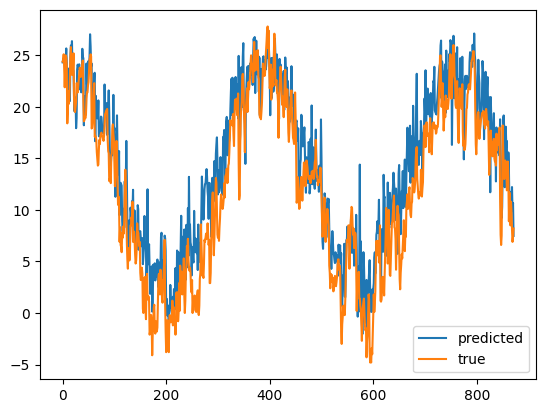

In [40]:
# plot predictions vs true values for temperature
y_pred_temp = scaler.inverse_transform(y_pred[0])
y_test_temp = y_test['temperature_2m_mean (°C)'].values.reshape(-1, 1)

from matplotlib import pyplot as plt
plt.plot(y_pred_temp)
plt.plot(y_test_temp)
plt.legend(['predicted', 'true'])
plt.show()


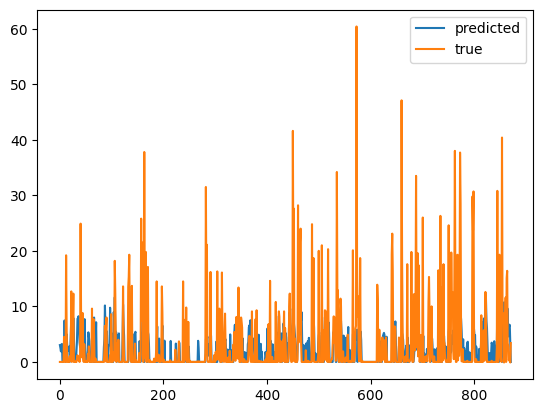

In [41]:
# plot predictions vs true values for precipitation
y_pred_precip = y_pred[2]
y_pred_precip[y_pred[1] < 0.5] = 0

y_test_precip = y_test['precipitation_sum (mm)'].values.reshape(-1, 1)

from matplotlib import pyplot as plt
plt.plot(y_pred_precip)
plt.plot(y_test_precip)
plt.legend(['predicted', 'true'])
plt.show()